# Pump It Up

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:
# 读入数据
train_data = pd.read_csv("train-data.csv")
train_labels = pd.read_csv("train-labels.csv")
test_data = pd.read_csv("test-data.csv")

# 把train数据合在一起便于分析
train = pd.merge(train_data, train_labels, on='id')

In [9]:
train_data.iloc[:, :10].head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0


In [10]:
train_data.iloc[:, 10:20].head()

,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by
0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd
1,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd
2,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd
3,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd
4,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd


In [11]:
train_data.iloc[:, 20:30].head()

,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment
0,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually
1,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay
2,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket
3,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay
4,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay


In [12]:
train_data.iloc[:, 30:].head()

,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


## 特征解释
id: 不用

### 管理者相关

date_recorded: 记录时间，目测不相关，可能存在记录误差

recorded_by: 记录人

permit: 经过允许的

funder: 赞助商

installer: 安装方，待确认与目标值的关系

scheme_management: 管理方

scheme_name: 管理方名称

management: 管理者

management_group: 管理者组别

---

---

### 地区相关

amount_tsh: 处理缺失值，异常值

gps_height: gps高度，有缺失值

longitude: 经度

latitude: 纬度

num_private: (无说明)

basin: 流域

subvillage: 地区

region: 地区

region_code: 地区code

district_code: 二级区域code

lga: 地区

ward: 地区

population: 人口

public_meeting: 聚集区？

---

---

### 取水点相关

construction_year: 建筑年份

wpt_name: 取水点的名字…

extraction_type: 抽水类型

extraction_type_group: 抽水类型分组

extraction_type_class: 抽水类型分类

payment: 付费类型

payment_type: 付费类型

water_quality: 水质

quality_group: 水质等级

quantity: 水量

quantity_group: 水量等级

source: 水源（同source_type）

source_type:水源类型（收集雨水、水坝、泉水、钻孔等）

source_class: 水源类型（地下水、地表水等）

waterpoint_type: 取水点类型

waterpoint_type_group: 同上


In [24]:
train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

### 关于funder的信息

In [48]:
# pd.pivot_table(data=train, index='funder', columns='status_group', values='id', aggfunc=len).fillna(0)

funder_cnt = train.groupby(['funder', 'status_group'])['id'].count().unstack(level=-1).fillna(0)
funder_cnt['total'] = funder_cnt.sum(axis=1)
funder_cnt.sort_values(by='total', ascending=False)

status_group,functional,functional needs repair,non functional,total
funder,,,,
Government Of Tanzania,3720.0,701.0,4663.0,9084.0
Danida,1713.0,159.0,1242.0,3114.0
Hesawa,936.0,232.0,1034.0,2202.0
Rwssp,805.0,109.0,460.0,1374.0
World Bank,545.0,97.0,707.0,1349.0
Kkkt,723.0,66.0,498.0,1287.0
World Vision,743.0,131.0,372.0,1246.0
Unicef,600.0,99.0,358.0,1057.0
Tasaf,493.0,64.0,320.0,877.0


In [51]:
funder_cnt.describe()

status_group,functional,functional needs repair,non functional,total
count,1897.000000,1897.000000,1897.000000,1897.000000
mean,15.960991,2.045335,11.390090,29.396415
std,110.468467,19.861972,119.271137,244.900445
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000,1.000000
75%,3.000000,0.000000,2.000000,7.000000
max,3720.000000,701.000000,4663.000000,9084.000000


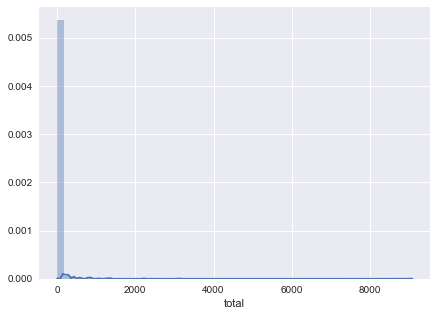

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
sns.distplot(funder_cnt['total'], ax=ax)

### 关于permit的信息

似乎True和False差别不大

In [70]:
permit_cnt = train.groupby(['permit', 'status_group'])['id'].count().reset_index()

In [71]:
permit_cnt

,permit,status_group,id
0,False,functional,9045
1,False,functional needs repair,1320
2,False,non functional,7127
3,True,functional,21541
4,True,functional needs repair,2697
5,True,non functional,14614


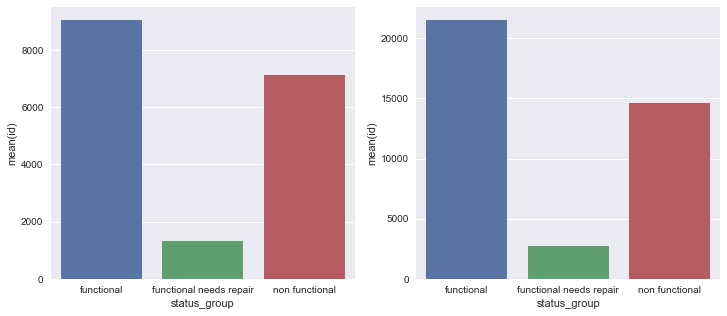

In [81]:
# 画图，左边是permit=False，右边是permit=True
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.barplot(data=permit_cnt[permit_cnt['permit']==False], x='status_group', y='id', ax=ax0)
sns.barplot(data=permit_cnt[permit_cnt['permit']==True], x='status_group', y='id', ax=ax1)